# Electric Vechicle Charging Patterns

For this project we will analyze the electric vechicle charging dataset from [Kaggle](https://www.kaggle.com/datasets/valakhorasani/electric-vehicle-charging-patterns). 

This dataset provides information about electric vehicle charging sessions, including user and vehicle IDs, vehicle model and age, battery capacity, charging station details, charging times, energy used, cost, and environmental factors like temperature. It also includes user type, distance driven, and charging conditions such as charger type and time of day.

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (6,4)

print('required libraries has been installed succefully!')

required libraries has been installed succefully!


In [4]:
# loading the data
df = pd.read_csv("/Users/oliviajardine/Programming Project/Electric Vehicle Charging/ev_charging_patterns.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [6]:
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


## Basic Analysis

Let's checkout highest and lowest charging costs.

In [7]:
# highest charging cost
df['Charging Cost (USD)'].max()

np.float64(69.40774319393012)

In [8]:
# lowest charging cost
df['Charging Cost (USD)'].min()

np.float64(0.2343169936142865)

Which days saw the most and least electric vehicle charging sessions?

In [9]:
df['Day of Week'].value_counts()

Day of Week
Saturday     205
Tuesday      200
Wednesday    197
Sunday       191
Friday       188
Monday       185
Thursday     154
Name: count, dtype: int64

# Data Processing

Let’s see how often commuters, casual drivers, versus long-distance travelers charged their EVs on each day of the week.

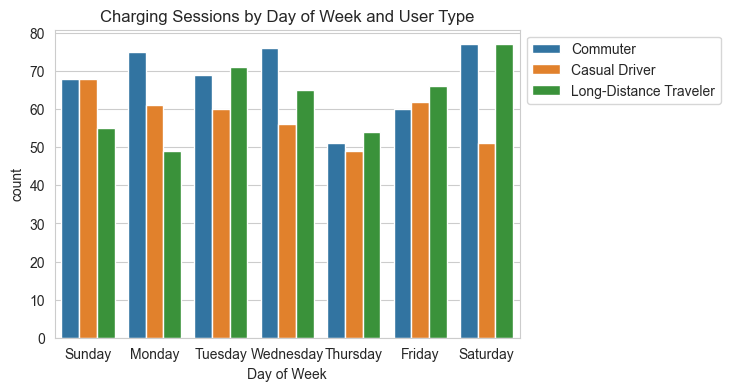

In [26]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday',
             'Thursday', 'Friday', 'Saturday']

sns.countplot(x=df['Day of Week'], hue=df['User Type'],
              data=df, order=day_order)
plt.title('Charging Sessions by Day of Week and User Type')
plt.legend(bbox_to_anchor=(1,1))

We can see that people charge their vehicles less often on thursday compared to any other day, no matter the user type. Though, commuters and long-distance drivers charge their vehicles more often than casual drivers.

Next, we'll change the charging start time to the correct datetime format and extract the day of the day of the week.

In [36]:
# Ensure 'Charging Start Time' is in datetime format
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])

# Extract the day of the week and hour from the charging start time
# Day of the week as name
df['Day of Week'] = df['Charging Start Time'].dt.day_name()
df['Hour of Day'] = df['Charging Start Time'].dt.hour  # Hour of the day

# Create a pivot table with 'Day of Week' as the rows and 'Hour of Day' as the columns
day_hour = df.pivot_table(values='Vehicle Model', index='Day of Week',
                          columns='Hour of Day', aggfunc='count', fill_value=0)

# Reorder the rows so that the days start from Monday
ordered_days = ['Monday', 'Tuesday', 'Wednesday',
                'Thursday', 'Friday', 'Saturday', 'Sunday']
day_hour = day_hour.loc[ordered_days]

Now, let's plot:

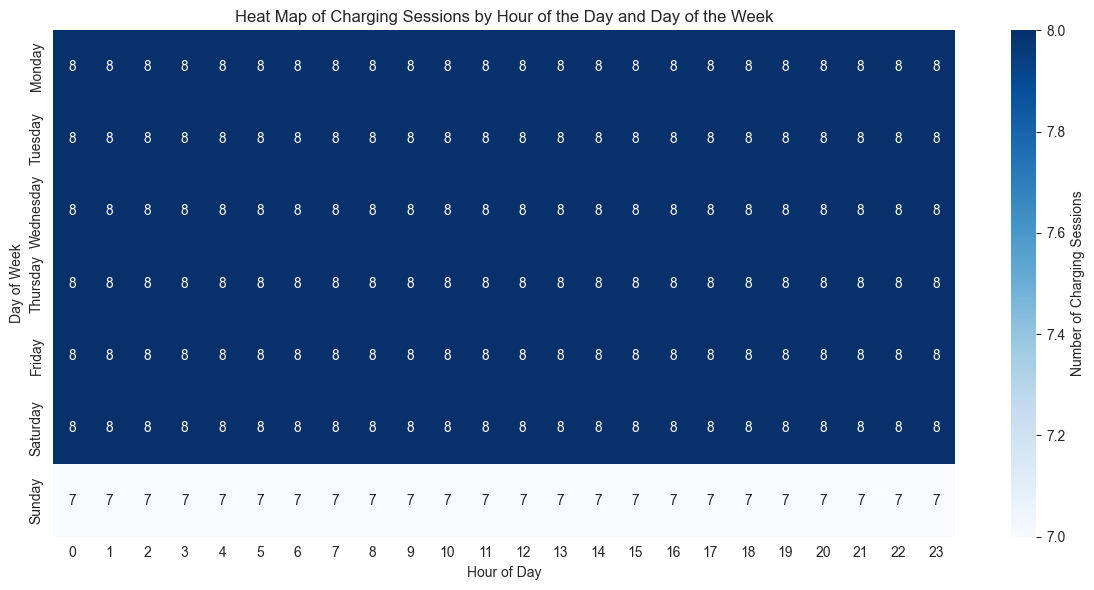

In [37]:
# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(day_hour, annot=True, fmt='d', cmap='Blues',
            cbar_kws={'label': 'Number of Charging Sessions'})

# Customize the plot
plt.title('Heat Map of Charging Sessions by Hour of the Day and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()

# Show the plot
plt.show()